In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("archive/reuters_headlines.csv")

In [2]:
df.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [3]:
review_df = df[['Headlines']]

print(review_df.shape)
review_df.head(5)

(32770, 1)


,Headlines
0,TikTok considers London and other locations fo...
1,Disney cuts ad spending on Facebook amid growi...
2,Trail of missing Wirecard executive leads to B...
3,Twitter says attackers downloaded data from up...
4,U.S. Republicans seek liability protections as...


In [4]:
first_row = df.head(1)

last_row = df. tail(1)

print(first_row)

print (last_row)

                                           Headlines         Time   
0  TikTok considers London and other locations fo...  Jul 18 2020  \

                                         Description  
0  TikTok has been in discussions with the UK gov...  
                                               Headlines         Time   
32769  UK will always consider ways to improve data l...  Mar 20 2018  \

                                             Description  
32769  Britain will consider any suggestions to give ...  


In [5]:
# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Filter data within the specified time frame
start_date = pd.to_datetime('2018-03-01')
end_date = pd.to_datetime('2020-07-31')
df_filtered = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

In [6]:
from textblob import TextBlob

# Perform sentiment analysis on headlines
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to filtered headlines
df_filtered['Sentiment'] = df_filtered['Headlines'].apply(analyze_sentiment)

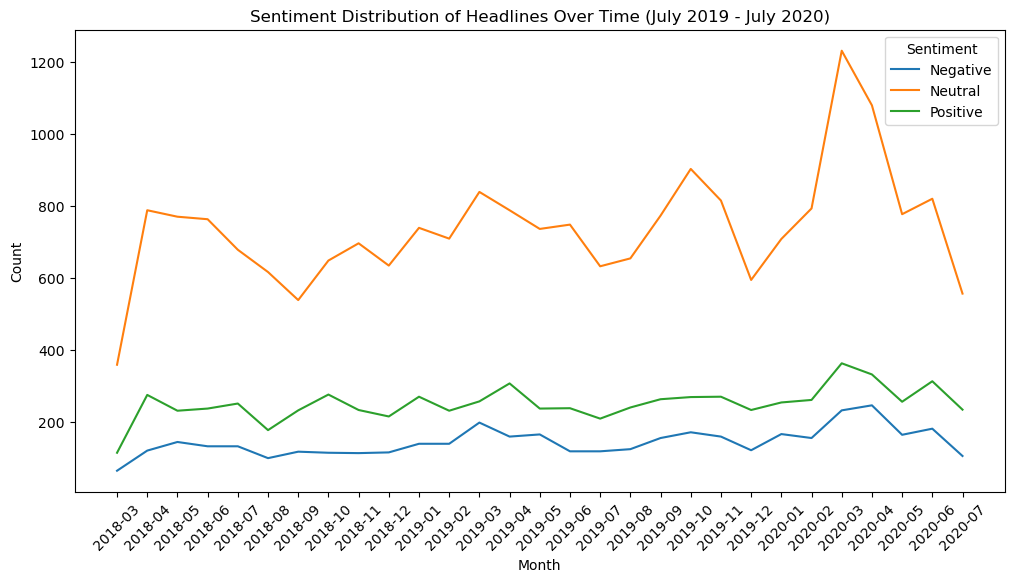

In [7]:
# Group by month and calculate sentiment distribution
df_sentiment_by_month = df_filtered.groupby(df_filtered['Time'].dt.to_period('M'))['Sentiment'].value_counts().unstack().fillna(0)

# Create line plot for sentiment distribution
plt.figure(figsize=(12, 6))
for sentiment in df_sentiment_by_month.columns:
    plt.plot(df_sentiment_by_month.index.astype(str), df_sentiment_by_month[sentiment], label=sentiment)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Sentiment Distribution of Headlines Over Time (July 2019 - July 2020)')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=45)
plt.show()